In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, binomial, Poly

In [139]:
def sort_vertices(pts):
    xpts = pts[:, 0]
    ypts = pts[:, 1]
    xc = np.sum(xpts) / len(xpts)
    yc = np.sum(ypts) / len(ypts)
    theta = np.arctan2(ypts - yc, xpts - xc) * 180 / np.pi
    indices = np.argsort(theta)
    return pts[indices]

def drawBezier(pts):
    num_pts = len(pts)
    sorted_pts = sort_vertices(pts)
    plt.figure(figsize=(5, 5))
    plt.scatter(sorted_pts[:, 0], sorted_pts[:, 1])
    plt.plot(sorted_pts[:, 0], sorted_pts[:, 1])
    P = np.empty((100, num_pts))
    param = np.linspace(0, 1, 100)
    for i in range(num_pts):
        P[:, i] = param ** (num_pts - i - 1)
    H = np.empty((num_pts, num_pts))
    x = symbols("x")
    
    for i in range(num_pts):
        H[:, i] = binomial(num_pts - 1, i) * np.array(Poly((1 - x) ** (num_pts - i - 1) * x ** i, x).all_coeffs())
    finalPts = P @ H @ sorted_pts
    plt.scatter(finalPts[:, 0], finalPts[:, 1], alpha=0.5)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.show()
    
def drawHermite(pts):
    num_pts = len(pts)
    if num_pts != 4:
        print("Specify 4 points")
        return None
    P = np.empty((100, num_pts))
    param = np.linspace(0, 1, 100)
    for i in range(num_pts):
        P[:, i] = param ** (num_pts - i - 1)
    H = np.empty((4, 4))
    x = symbols("x")
    
    H[:, 0] = [2, -3, 0, 1]
    H[:, 1] = [-2, 3, 0, 0]
    H[:, 2] = [1, -2, 1, 0]
    H[:, 3] = [1, -1, 0, 0]
    finalPts = P @ H @ pts
    plt.figure(figsize=(5, 5))
    plt.scatter(pts[:2, 0], pts[:2, 1])
    plt.scatter(finalPts[:, 0], finalPts[:, 1], alpha=0.3)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.show()

Control Points
(16, 71)
(87, 70)
(70, 5)
(46, 27)
(26, 28)
(24, 74)
(94, 5)
(63, 97)
(41, 98)


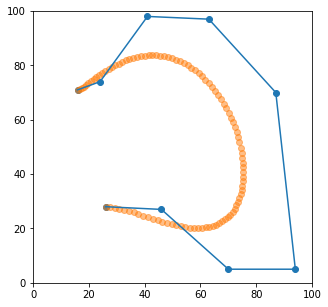

In [140]:
num_pts = np.random.randint(3, 10)
pts = np.random.randint(1, 100, (num_pts, 2))
print("Control Points")
print("\n".join(list(map(str, list(zip(pts[:, 0], pts[:, 1]))))))
drawBezier(pts)

End Points
(53, 42)
(19, 83)
Direction Tangents at endpoints
(93, 61)
(73, 21)


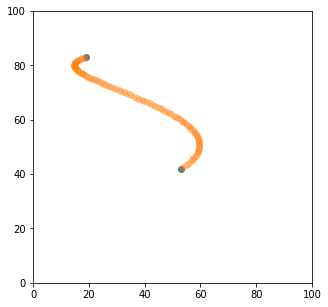

In [144]:
num_pts = 4
pts = np.random.randint(1, 100, (num_pts, 2))
print("End Points")
print("\n".join(list(map(str, list(zip(pts[:2, 0], pts[:2, 1]))))))
print("Direction Tangents at endpoints")
print("\n".join(list(map(str, list(zip(pts[2:, 0], pts[2:, 1]))))))
drawHermite(pts)